In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
import json 

data_saison = json.load(open("season_match_stats.json"))

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
table = []

for index, value in data_saison.items():
    ligne = [index] + list(value.values())  
    table.append(ligne)
    
df_saison = pd.DataFrame(table, columns = ['id_match', 'home_team_id', 'away_team_id', 'home_team_name', 'away_team_name', 'date_string', 'half_time_score', 'full_time_score'])
df_saison.head()

,id_match,home_team_id,away_team_id,home_team_name,away_team_name,date_string,half_time_score,full_time_score
0,1080506,13,26,Arsenal,Liverpool,14/08/2016 16:00:00,1 : 1,3 : 4
1,1080507,183,32,Bournemouth,Manchester United,14/08/2016 13:30:00,0 : 1,1 : 3
2,1080508,184,259,Burnley,Swansea,13/08/2016 15:00:00,0 : 0,0 : 1
3,1080509,15,29,Chelsea,West Ham,15/08/2016 20:00:00,0 : 0,2 : 1
4,1080510,162,175,Crystal Palace,West Bromwich Albion,13/08/2016 15:00:00,0 : 0,0 : 1


In [4]:
df_saison.shape

(380, 8)

In [5]:
data_match = json.load(open("season_stats.json",encoding='utf-8'))

In [6]:
table = []

for index, value in data_match.items():
    home = dict(list(value.values())[0])
    ligne = [index] + list(home['team_details'].values())  
    table.append(ligne)
    
df_match_home = pd.DataFrame(table, columns = ['id_match', 'team_id_home', 'team_name_home', 'team_rating_home', 'date'])


In [7]:
df_match_home.shape

(380, 5)

In [8]:
compteur = 0
for index, value in data_match.items():
    home = dict(list(value.values())[0])
    
    for i,j in home['aggregate_stats'].items() :
        df_match_home.loc[compteur, i] = j
         
    compteur += 1
    
print("dataframe des equipes à domicile :")    
df_match_home.head()

dataframe des equipes à domicile :


,id_match,team_id_home,team_name_home,team_rating_home,date,att_goal_low_right,won_contest,possession_percentage,total_throws,blocked_scoring_att,att_sv_low_left,total_tackle,aerial_won,att_miss_right,att_sv_high_centre,aerial_lost,total_pass,att_goal_low_left,won_corners,shot_off_target,ontarget_scoring_att,goals,total_scoring_att,fk_foul_lost,total_offside,att_miss_high,accurate_pass,att_sv_low_centre,att_goal_high_right,att_sv_low_right,att_miss_high_left,att_miss_high_right,att_sv_high_right,att_miss_left,att_sv_high_left,att_goal_high_centre,att_pen_goal,att_goal_high_left,att_post_right,post_scoring_att,att_goal_low_centre,att_post_high,att_post_left,penalty_save
0,1080506,13,Arsenal,6.67785714285714,14/08/2016,1,10,50.7,25,1,1,22,22,1,1,17,485,2,5,3,5,3,9,13,4,2,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1080507,183,Bournemouth,6.33785714285714,14/08/2016,NaN,13,47.4,26,4,NaN,15,8,1,NaN,8,483,NaN,4,2,3,1,9,7,3,NaN,412,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1080508,184,Burnley,6.59,13/08/2016,NaN,6,47.5,41,2,NaN,14,20,1,NaN,32,353,NaN,7,5,3,NaN,10,10,3,2,249,1,NaN,1,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1080509,15,Chelsea,6.90142857142857,15/08/2016,NaN,16,61.7,29,4,1,18,24,2,NaN,25,556,1,7,6,6,2,16,16,1,1,480,1,NaN,1,1,1,NaN,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1080510,162,Crystal Palace,6.67071428571428,13/08/2016,NaN,8,62.3,21,3,NaN,28,21,3,NaN,21,414,NaN,3,7,4,NaN,14,12,NaN,1,298,3,NaN,1,NaN,1,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_match_home.shape

(380, 44)

In [10]:
table = []

for index, value in data_match.items():
    away = dict(list(value.values())[1])
    ligne = [index] + list(away['team_details'].values())  
    table.append(ligne)
    
df_match_away = pd.DataFrame(table, columns = ['id_match', 'team_id_away', 'team_name_away', 'team_rating_away', 'date'])

In [11]:
compteur = 0
for index, value in data_match.items():
    away = dict(list(value.values())[1])
    
    for i,j in away['aggregate_stats'].items() :
        df_match_away.loc[compteur, i] = j
         
    compteur += 1
    
print("dataframe des equipes à l'extérieur :")    
df_match_away.head()

dataframe des equipes à l'extérieur :


,id_match,team_id_away,team_name_away,team_rating_away,date,won_contest,possession_percentage,total_throws,blocked_scoring_att,penalty_save,total_scoring_att,att_sv_low_left,total_tackle,aerial_won,aerial_lost,accurate_pass,total_pass,won_corners,shot_off_target,ontarget_scoring_att,goals,att_miss_left,fk_foul_lost,total_offside,att_sv_low_right,att_goal_high_left,att_goal_low_centre,att_sv_high_left,att_sv_low_centre,att_goal_low_left,att_miss_right,att_goal_low_right,att_miss_high_left,att_miss_high_right,att_miss_high,att_sv_high_centre,att_pen_goal,att_goal_high_right,att_sv_high_right,att_goal_high_centre,att_post_right,post_scoring_att,att_post_high,att_post_left
0,1080506,26,Liverpool,7.02714285714286,14/08/2016,11,49.3,22,6,1,16,1,21,17,22,380,479,4,3,7,4,3,17,3,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1080507,32,Manchester United,7.05428571428571,14/08/2016,8,52.6,17,2,NaN,11,NaN,27,8,8,488,561,2,2,7,3,NaN,10,4,NaN,NaN,NaN,1,3,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1080508,259,Swansea,7.32071428571429,13/08/2016,8,52.5,13,2,NaN,17,2,19,32,20,297,383,4,6,9,1,1,14,2,2,NaN,NaN,1,2,NaN,1,1,1,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1080509,29,West Ham,6.58214285714286,15/08/2016,3,38.3,12,2,NaN,7,1,25,25,24,257,350,1,2,3,1,1,16,1,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1080510,175,West Bromwich Albion,7.03384615384615,13/08/2016,5,37.7,34,2,NaN,13,NaN,18,21,21,143,245,6,8,3,1,3,15,2,1,NaN,NaN,NaN,1,1,2,NaN,1,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# YD - À partir de là c'est ce que j'ai fait

df_1617 = pd.merge(df_match_home,df_match_away,how='left',on='id_match')
df_1617.head()

,id_match,team_id_home,team_name_home,team_rating_home,date_x,att_goal_low_right_x,won_contest_x,possession_percentage_x,total_throws_x,blocked_scoring_att_x,att_sv_low_left_x,total_tackle_x,aerial_won_x,att_miss_right_x,att_sv_high_centre_x,aerial_lost_x,total_pass_x,att_goal_low_left_x,won_corners_x,shot_off_target_x,ontarget_scoring_att_x,goals_x,total_scoring_att_x,fk_foul_lost_x,total_offside_x,att_miss_high_x,accurate_pass_x,att_sv_low_centre_x,att_goal_high_right_x,att_sv_low_right_x,att_miss_high_left_x,att_miss_high_right_x,att_sv_high_right_x,att_miss_left_x,att_sv_high_left_x,att_goal_high_centre_x,att_pen_goal_x,att_goal_high_left_x,att_post_right_x,post_scoring_att_x,att_goal_low_centre_x,att_post_high_x,att_post_left_x,penalty_save_x,team_id_away,team_name_away,team_rating_away,date_y,won_contest_y,possession_percentage_y,total_throws_y,blocked_scoring_att_y,penalty_save_y,total_scoring_att_y,att_sv_low_left_y,total_tackle_y,aerial_won_y,aerial_lost_y,accurate_pass_y,total_pass_y,won_corners_y,shot_off_target_y,ontarget_scoring_att_y,goals_y,att_miss_left_y,fk_foul_lost_y,total_offside_y,att_sv_low_right_y,att_goal_high_left_y,att_goal_low_centre_y,att_sv_high_left_y,att_sv_low_centre_y,att_goal_low_left_y,att_miss_right_y,att_goal_low_right_y,att_miss_high_left_y,att_miss_high_right_y,att_miss_high_y,att_sv_high_centre_y,att_pen_goal_y,att_goal_high_right_y,att_sv_high_right_y,att_goal_high_centre_y,att_post_right_y,post_scoring_att_y,att_post_high_y,att_post_left_y
0,1080506,13,Arsenal,6.67785714285714,14/08/2016,1,10,50.7,25,1,1,22,22,1,1,17,485,2,5,3,5,3,9,13,4,2,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,Liverpool,7.02714285714286,14/08/2016,11,49.3,22,6,1,16,1,21,17,22,380,479,4,3,7,4,3,17,3,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1080507,183,Bournemouth,6.33785714285714,14/08/2016,NaN,13,47.4,26,4,NaN,15,8,1,NaN,8,483,NaN,4,2,3,1,9,7,3,NaN,412,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,Manchester United,7.05428571428571,14/08/2016,8,52.6,17,2,NaN,11,NaN,27,8,8,488,561,2,2,7,3,NaN,10,4,NaN,NaN,NaN,1,3,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1080508,184,Burnley,6.59,13/08/2016,NaN,6,47.5,41,2,NaN,14,20,1,NaN,32,353,NaN,7,5,3,NaN,10,10,3,2,249,1,NaN,1,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,Swansea,7.32071428571429,13/08/2016,8,52.5,13,2,NaN,17,2,19,32,20,297,383,4,6,9,1,1,14,2,2,NaN,NaN,1,2,NaN,1,1,1,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1080509,15,Chelsea,6.90142857142857,15/08/2016,NaN,16,61.7,29,4,1,18,24,2,NaN,25,556,1,7,6,6,2,16,16,1,1,480,1,NaN,1,1,1,NaN,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,West Ham,6.58214285714286,15/08/2016,3,38.3,12,2,NaN,7,1,25,25,24,257,350,1,2,3,1,1,16,1,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1080510,162,Crystal Palace,6.67071428571428,13/08/2016,NaN,8,62.3,21,3,NaN,28,21,3,NaN,21,414,NaN,3,7,4,NaN,14,12,NaN,1,298,3,NaN,1,NaN,1,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175,West Bromwich Albion,7.03384615384615,13/08/2016,5,37.7,34,2,NaN,13,NaN,18,21,21,143,245,6,8,3,1,3,15,2,1,NaN,NaN,NaN,1,1,2,NaN,1,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_1617.shape

(380, 87)

In [14]:
df_1617 = df_1617.fillna(0)
df_1617 = df_1617.sort_values(by='id_match',ascending=True)
df_1617.head()


,id_match,team_id_home,team_name_home,team_rating_home,date_x,att_goal_low_right_x,won_contest_x,possession_percentage_x,total_throws_x,blocked_scoring_att_x,att_sv_low_left_x,total_tackle_x,aerial_won_x,att_miss_right_x,att_sv_high_centre_x,aerial_lost_x,total_pass_x,att_goal_low_left_x,won_corners_x,shot_off_target_x,ontarget_scoring_att_x,goals_x,total_scoring_att_x,fk_foul_lost_x,total_offside_x,att_miss_high_x,accurate_pass_x,att_sv_low_centre_x,att_goal_high_right_x,att_sv_low_right_x,att_miss_high_left_x,att_miss_high_right_x,att_sv_high_right_x,att_miss_left_x,att_sv_high_left_x,att_goal_high_centre_x,att_pen_goal_x,att_goal_high_left_x,att_post_right_x,post_scoring_att_x,att_goal_low_centre_x,att_post_high_x,att_post_left_x,penalty_save_x,team_id_away,team_name_away,team_rating_away,date_y,won_contest_y,possession_percentage_y,total_throws_y,blocked_scoring_att_y,penalty_save_y,total_scoring_att_y,att_sv_low_left_y,total_tackle_y,aerial_won_y,aerial_lost_y,accurate_pass_y,total_pass_y,won_corners_y,shot_off_target_y,ontarget_scoring_att_y,goals_y,att_miss_left_y,fk_foul_lost_y,total_offside_y,att_sv_low_right_y,att_goal_high_left_y,att_goal_low_centre_y,att_sv_high_left_y,att_sv_low_centre_y,att_goal_low_left_y,att_miss_right_y,att_goal_low_right_y,att_miss_high_left_y,att_miss_high_right_y,att_miss_high_y,att_sv_high_centre_y,att_pen_goal_y,att_goal_high_right_y,att_sv_high_right_y,att_goal_high_centre_y,att_post_right_y,post_scoring_att_y,att_post_high_y,att_post_left_y
0,1080506,13,Arsenal,6.67785714285714,14/08/2016,1,10,50.7,25,1,1,22,22,1,1,17,485,2,5,3,5,3,9,13,4,2,386,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,Liverpool,7.02714285714286,14/08/2016,11,49.3,22,6,1,16,1,21,17,22,380,479,4,3,7,4,3,17,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1080507,183,Bournemouth,6.33785714285714,14/08/2016,0,13,47.4,26,4,0,15,8,1,0,8,483,0,4,2,3,1,9,7,3,0,412,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,32,Manchester United,7.05428571428571,14/08/2016,8,52.6,17,2,0,11,0,27,8,8,488,561,2,2,7,3,0,10,4,0,0,0,1,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1080508,184,Burnley,6.59,13/08/2016,0,6,47.5,41,2,0,14,20,1,0,32,353,0,7,5,3,0,10,10,3,2,249,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,259,Swansea,7.32071428571429,13/08/2016,8,52.5,13,2,0,17,2,19,32,20,297,383,4,6,9,1,1,14,2,2,0,0,1,2,0,1,1,1,1,2,1,0,0,0,0,0,0,0,0
3,1080509,15,Chelsea,6.90142857142857,15/08/2016,0,16,61.7,29,4,1,18,24,2,0,25,556,1,7,6,6,2,16,16,1,1,480,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,29,West Ham,6.58214285714286,15/08/2016,3,38.3,12,2,0,7,1,25,25,24,257,350,1,2,3,1,1,16,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1080510,162,Crystal Palace,6.67071428571428,13/08/2016,0,8,62.3,21,3,0,28,21,3,0,21,414,0,3,7,4,0,14,12,0,1,298,3,0,1,0,1,0,2,0,0,0,0,0,0,0,0,0,0,175,West Bromwich Albion,7.03384615384615,13/08/2016,5,37.7,34,2,0,13,0,18,21,21,143,245,6,8,3,1,3,15,2,1,0,0,0,1,1,2,0,1,0,2,0,0,0,0,0,0,0,0,0


In [15]:
# Changement des types des colonnes 
cols=[i for i in df_1617.columns if i not in ["team_name_home","team_rating_home","date_x",'possession_percentage_x','team_name_away','team_rating_away','date_y','possession_percentage_y']]
for column in cols:
    df_1617[column] = df_1617[column].astype(int)

cols=[i for i in df_1617.columns if i in ["team_name_home","date_x",'team_name_away','date_y']]
for column in cols:
    df_1617[column] = df_1617[column].apply(str)
    
cols=[i for i in df_1617.columns if i in ["team_rating_home",'possession_percentage_x','team_rating_away','possession_percentage_y']]
for column in cols:
    df_1617[column] = df_1617[column].apply(float)
    
df_1617.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 379
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_match                 380 non-null    int32  
 1   team_id_home             380 non-null    int32  
 2   team_name_home           380 non-null    object 
 3   team_rating_home         380 non-null    float64
 4   date_x                   380 non-null    object 
 5   att_goal_low_right_x     380 non-null    int32  
 6   won_contest_x            380 non-null    int32  
 7   possession_percentage_x  380 non-null    float64
 8   total_throws_x           380 non-null    int32  
 9   blocked_scoring_att_x    380 non-null    int32  
 10  att_sv_low_left_x        380 non-null    int32  
 11  total_tackle_x           380 non-null    int32  
 12  aerial_won_x             380 non-null    int32  
 13  att_miss_right_x         380 non-null    int32  
 14  att_sv_high_centre_x     3

In [16]:
df_score=df_1617[['id_match','team_name_home','goals_x','goals_y','team_name_away']]
df_score.head()

df_score.insert(5,'winner',np.linspace(0,0,len(df_score['team_name_home'])))


# Ajout d'une colonne winner
for i in df_score['team_name_home'].index:
    
    if(df_score['goals_x'][i] > df_score['goals_y'][i]):
        df_score['winner'][i]=0#df_score['team_name_home'][i]  :  équivaut à 
    elif(df_score['goals_x'][i]  < df_score['goals_y'][i]):
        df_score['winner'][i]=1#df_score['team_name_away'][i]
    else:
        df_score['winner'][i]=2#'draw'
df_score.head(20)

<ipython-input-16-fcf5efa95ecc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['winner'][i]=1#df_score['team_name_away'][i]
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-16-fcf5efa95ecc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['winner'][i]=0#df_score['team_name

,id_match,team_name_home,goals_x,goals_y,team_name_away,winner
0,1080506,Arsenal,3,4,Liverpool,1.0
1,1080507,Bournemouth,1,3,Manchester United,1.0
2,1080508,Burnley,0,1,Swansea,1.0
3,1080509,Chelsea,2,1,West Ham,0.0
4,1080510,Crystal Palace,0,1,West Bromwich Albion,1.0
5,1080511,Everton,1,1,Tottenham,2.0
6,1080512,Hull,2,1,Leicester,0.0
7,1080513,Manchester City,2,1,Sunderland,0.0
8,1080514,Middlesbrough,1,1,Stoke,2.0
9,1080515,Southampton,1,1,Watford,2.0


In [17]:
df_1617.head()

,id_match,team_id_home,team_name_home,team_rating_home,date_x,att_goal_low_right_x,won_contest_x,possession_percentage_x,total_throws_x,blocked_scoring_att_x,att_sv_low_left_x,total_tackle_x,aerial_won_x,att_miss_right_x,att_sv_high_centre_x,aerial_lost_x,total_pass_x,att_goal_low_left_x,won_corners_x,shot_off_target_x,ontarget_scoring_att_x,goals_x,total_scoring_att_x,fk_foul_lost_x,total_offside_x,att_miss_high_x,accurate_pass_x,att_sv_low_centre_x,att_goal_high_right_x,att_sv_low_right_x,att_miss_high_left_x,att_miss_high_right_x,att_sv_high_right_x,att_miss_left_x,att_sv_high_left_x,att_goal_high_centre_x,att_pen_goal_x,att_goal_high_left_x,att_post_right_x,post_scoring_att_x,att_goal_low_centre_x,att_post_high_x,att_post_left_x,penalty_save_x,team_id_away,team_name_away,team_rating_away,date_y,won_contest_y,possession_percentage_y,total_throws_y,blocked_scoring_att_y,penalty_save_y,total_scoring_att_y,att_sv_low_left_y,total_tackle_y,aerial_won_y,aerial_lost_y,accurate_pass_y,total_pass_y,won_corners_y,shot_off_target_y,ontarget_scoring_att_y,goals_y,att_miss_left_y,fk_foul_lost_y,total_offside_y,att_sv_low_right_y,att_goal_high_left_y,att_goal_low_centre_y,att_sv_high_left_y,att_sv_low_centre_y,att_goal_low_left_y,att_miss_right_y,att_goal_low_right_y,att_miss_high_left_y,att_miss_high_right_y,att_miss_high_y,att_sv_high_centre_y,att_pen_goal_y,att_goal_high_right_y,att_sv_high_right_y,att_goal_high_centre_y,att_post_right_y,post_scoring_att_y,att_post_high_y,att_post_left_y
0,1080506,13,Arsenal,6.677857,14/08/2016,1,10,50.7,25,1,1,22,22,1,1,17,485,2,5,3,5,3,9,13,4,2,386,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,Liverpool,7.027143,14/08/2016,11,49.3,22,6,1,16,1,21,17,22,380,479,4,3,7,4,3,17,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1080507,183,Bournemouth,6.337857,14/08/2016,0,13,47.4,26,4,0,15,8,1,0,8,483,0,4,2,3,1,9,7,3,0,412,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,32,Manchester United,7.054286,14/08/2016,8,52.6,17,2,0,11,0,27,8,8,488,561,2,2,7,3,0,10,4,0,0,0,1,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1080508,184,Burnley,6.590000,13/08/2016,0,6,47.5,41,2,0,14,20,1,0,32,353,0,7,5,3,0,10,10,3,2,249,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,259,Swansea,7.320714,13/08/2016,8,52.5,13,2,0,17,2,19,32,20,297,383,4,6,9,1,1,14,2,2,0,0,1,2,0,1,1,1,1,2,1,0,0,0,0,0,0,0,0
3,1080509,15,Chelsea,6.901429,15/08/2016,0,16,61.7,29,4,1,18,24,2,0,25,556,1,7,6,6,2,16,16,1,1,480,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,29,West Ham,6.582143,15/08/2016,3,38.3,12,2,0,7,1,25,25,24,257,350,1,2,3,1,1,16,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1080510,162,Crystal Palace,6.670714,13/08/2016,0,8,62.3,21,3,0,28,21,3,0,21,414,0,3,7,4,0,14,12,0,1,298,3,0,1,0,1,0,2,0,0,0,0,0,0,0,0,0,0,175,West Bromwich Albion,7.033846,13/08/2016,5,37.7,34,2,0,13,0,18,21,21,143,245,6,8,3,1,3,15,2,1,0,0,0,1,1,2,0,1,0,2,0,0,0,0,0,0,0,0,0


In [18]:
#ajout de la colonne winner sur df_1617
df_1617 = pd.merge(df_1617,df_score[['id_match','winner']], how='left', on='id_match')
df_1617.head()

,id_match,team_id_home,team_name_home,team_rating_home,date_x,att_goal_low_right_x,won_contest_x,possession_percentage_x,total_throws_x,blocked_scoring_att_x,att_sv_low_left_x,total_tackle_x,aerial_won_x,att_miss_right_x,att_sv_high_centre_x,aerial_lost_x,total_pass_x,att_goal_low_left_x,won_corners_x,shot_off_target_x,ontarget_scoring_att_x,goals_x,total_scoring_att_x,fk_foul_lost_x,total_offside_x,att_miss_high_x,accurate_pass_x,att_sv_low_centre_x,att_goal_high_right_x,att_sv_low_right_x,att_miss_high_left_x,att_miss_high_right_x,att_sv_high_right_x,att_miss_left_x,att_sv_high_left_x,att_goal_high_centre_x,att_pen_goal_x,att_goal_high_left_x,att_post_right_x,post_scoring_att_x,att_goal_low_centre_x,att_post_high_x,att_post_left_x,penalty_save_x,team_id_away,team_name_away,team_rating_away,date_y,won_contest_y,possession_percentage_y,total_throws_y,blocked_scoring_att_y,penalty_save_y,total_scoring_att_y,att_sv_low_left_y,total_tackle_y,aerial_won_y,aerial_lost_y,accurate_pass_y,total_pass_y,won_corners_y,shot_off_target_y,ontarget_scoring_att_y,goals_y,att_miss_left_y,fk_foul_lost_y,total_offside_y,att_sv_low_right_y,att_goal_high_left_y,att_goal_low_centre_y,att_sv_high_left_y,att_sv_low_centre_y,att_goal_low_left_y,att_miss_right_y,att_goal_low_right_y,att_miss_high_left_y,att_miss_high_right_y,att_miss_high_y,att_sv_high_centre_y,att_pen_goal_y,att_goal_high_right_y,att_sv_high_right_y,att_goal_high_centre_y,att_post_right_y,post_scoring_att_y,att_post_high_y,att_post_left_y,winner
0,1080506,13,Arsenal,6.677857,14/08/2016,1,10,50.7,25,1,1,22,22,1,1,17,485,2,5,3,5,3,9,13,4,2,386,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,Liverpool,7.027143,14/08/2016,11,49.3,22,6,1,16,1,21,17,22,380,479,4,3,7,4,3,17,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,1080507,183,Bournemouth,6.337857,14/08/2016,0,13,47.4,26,4,0,15,8,1,0,8,483,0,4,2,3,1,9,7,3,0,412,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,32,Manchester United,7.054286,14/08/2016,8,52.6,17,2,0,11,0,27,8,8,488,561,2,2,7,3,0,10,4,0,0,0,1,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
2,1080508,184,Burnley,6.590000,13/08/2016,0,6,47.5,41,2,0,14,20,1,0,32,353,0,7,5,3,0,10,10,3,2,249,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,259,Swansea,7.320714,13/08/2016,8,52.5,13,2,0,17,2,19,32,20,297,383,4,6,9,1,1,14,2,2,0,0,1,2,0,1,1,1,1,2,1,0,0,0,0,0,0,0,0,1.0
3,1080509,15,Chelsea,6.901429,15/08/2016,0,16,61.7,29,4,1,18,24,2,0,25,556,1,7,6,6,2,16,16,1,1,480,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,29,West Ham,6.582143,15/08/2016,3,38.3,12,2,0,7,1,25,25,24,257,350,1,2,3,1,1,16,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,1080510,162,Crystal Palace,6.670714,13/08/2016,0,8,62.3,21,3,0,28,21,3,0,21,414,0,3,7,4,0,14,12,0,1,298,3,0,1,0,1,0,2,0,0,0,0,0,0,0,0,0,0,175,West Bromwich Albion,7.033846,13/08/2016,5,37.7,34,2,0,13,0,18,21,21,143,245,6,8,3,1,3,15,2,1,0,0,0,1,1,2,0,1,0,2,0,0,0,0,0,0,0,0,0,1.0


In [19]:
# on dichotomise la variable winner
df_1617 = df_1617.join(pd.get_dummies(df_score['winner']))
df_1617 = df_1617.drop('winner', axis = 1)
df_1617.head()

,id_match,team_id_home,team_name_home,team_rating_home,date_x,att_goal_low_right_x,won_contest_x,possession_percentage_x,total_throws_x,blocked_scoring_att_x,att_sv_low_left_x,total_tackle_x,aerial_won_x,att_miss_right_x,att_sv_high_centre_x,aerial_lost_x,total_pass_x,att_goal_low_left_x,won_corners_x,shot_off_target_x,ontarget_scoring_att_x,goals_x,total_scoring_att_x,fk_foul_lost_x,total_offside_x,att_miss_high_x,accurate_pass_x,att_sv_low_centre_x,att_goal_high_right_x,att_sv_low_right_x,att_miss_high_left_x,att_miss_high_right_x,att_sv_high_right_x,att_miss_left_x,att_sv_high_left_x,att_goal_high_centre_x,att_pen_goal_x,att_goal_high_left_x,att_post_right_x,post_scoring_att_x,att_goal_low_centre_x,att_post_high_x,att_post_left_x,penalty_save_x,team_id_away,team_name_away,team_rating_away,date_y,won_contest_y,possession_percentage_y,total_throws_y,blocked_scoring_att_y,penalty_save_y,total_scoring_att_y,att_sv_low_left_y,total_tackle_y,aerial_won_y,aerial_lost_y,accurate_pass_y,total_pass_y,won_corners_y,shot_off_target_y,ontarget_scoring_att_y,goals_y,att_miss_left_y,fk_foul_lost_y,total_offside_y,att_sv_low_right_y,att_goal_high_left_y,att_goal_low_centre_y,att_sv_high_left_y,att_sv_low_centre_y,att_goal_low_left_y,att_miss_right_y,att_goal_low_right_y,att_miss_high_left_y,att_miss_high_right_y,att_miss_high_y,att_sv_high_centre_y,att_pen_goal_y,att_goal_high_right_y,att_sv_high_right_y,att_goal_high_centre_y,att_post_right_y,post_scoring_att_y,att_post_high_y,att_post_left_y,0.0,1.0,2.0
0,1080506,13,Arsenal,6.677857,14/08/2016,1,10,50.7,25,1,1,22,22,1,1,17,485,2,5,3,5,3,9,13,4,2,386,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,Liverpool,7.027143,14/08/2016,11,49.3,22,6,1,16,1,21,17,22,380,479,4,3,7,4,3,17,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1080507,183,Bournemouth,6.337857,14/08/2016,0,13,47.4,26,4,0,15,8,1,0,8,483,0,4,2,3,1,9,7,3,0,412,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,32,Manchester United,7.054286,14/08/2016,8,52.6,17,2,0,11,0,27,8,8,488,561,2,2,7,3,0,10,4,0,0,0,1,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1080508,184,Burnley,6.590000,13/08/2016,0,6,47.5,41,2,0,14,20,1,0,32,353,0,7,5,3,0,10,10,3,2,249,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,259,Swansea,7.320714,13/08/2016,8,52.5,13,2,0,17,2,19,32,20,297,383,4,6,9,1,1,14,2,2,0,0,1,2,0,1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,1,0
3,1080509,15,Chelsea,6.901429,15/08/2016,0,16,61.7,29,4,1,18,24,2,0,25,556,1,7,6,6,2,16,16,1,1,480,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,29,West Ham,6.582143,15/08/2016,3,38.3,12,2,0,7,1,25,25,24,257,350,1,2,3,1,1,16,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1080510,162,Crystal Palace,6.670714,13/08/2016,0,8,62.3,21,3,0,28,21,3,0,21,414,0,3,7,4,0,14,12,0,1,298,3,0,1,0,1,0,2,0,0,0,0,0,0,0,0,0,0,175,West Bromwich Albion,7.033846,13/08/2016,5,37.7,34,2,0,13,0,18,21,21,143,245,6,8,3,1,3,15,2,1,0,0,0,1,1,2,0,1,0,2,0,0,0,0,0,0,0,0,0,0,1,0


In [20]:
df_1617 = df_1617.rename({0.0: 'Home_wins', 1.0:'Away_wins' , 2.0 : 'Draw'}, axis = 1)
df_1617.head()

,id_match,team_id_home,team_name_home,team_rating_home,date_x,att_goal_low_right_x,won_contest_x,possession_percentage_x,total_throws_x,blocked_scoring_att_x,att_sv_low_left_x,total_tackle_x,aerial_won_x,att_miss_right_x,att_sv_high_centre_x,aerial_lost_x,total_pass_x,att_goal_low_left_x,won_corners_x,shot_off_target_x,ontarget_scoring_att_x,goals_x,total_scoring_att_x,fk_foul_lost_x,total_offside_x,att_miss_high_x,accurate_pass_x,att_sv_low_centre_x,att_goal_high_right_x,att_sv_low_right_x,att_miss_high_left_x,att_miss_high_right_x,att_sv_high_right_x,att_miss_left_x,att_sv_high_left_x,att_goal_high_centre_x,att_pen_goal_x,att_goal_high_left_x,att_post_right_x,post_scoring_att_x,att_goal_low_centre_x,att_post_high_x,att_post_left_x,penalty_save_x,team_id_away,team_name_away,team_rating_away,date_y,won_contest_y,possession_percentage_y,total_throws_y,blocked_scoring_att_y,penalty_save_y,total_scoring_att_y,att_sv_low_left_y,total_tackle_y,aerial_won_y,aerial_lost_y,accurate_pass_y,total_pass_y,won_corners_y,shot_off_target_y,ontarget_scoring_att_y,goals_y,att_miss_left_y,fk_foul_lost_y,total_offside_y,att_sv_low_right_y,att_goal_high_left_y,att_goal_low_centre_y,att_sv_high_left_y,att_sv_low_centre_y,att_goal_low_left_y,att_miss_right_y,att_goal_low_right_y,att_miss_high_left_y,att_miss_high_right_y,att_miss_high_y,att_sv_high_centre_y,att_pen_goal_y,att_goal_high_right_y,att_sv_high_right_y,att_goal_high_centre_y,att_post_right_y,post_scoring_att_y,att_post_high_y,att_post_left_y,Home_wins,Away_wins,Draw
0,1080506,13,Arsenal,6.677857,14/08/2016,1,10,50.7,25,1,1,22,22,1,1,17,485,2,5,3,5,3,9,13,4,2,386,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,Liverpool,7.027143,14/08/2016,11,49.3,22,6,1,16,1,21,17,22,380,479,4,3,7,4,3,17,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1080507,183,Bournemouth,6.337857,14/08/2016,0,13,47.4,26,4,0,15,8,1,0,8,483,0,4,2,3,1,9,7,3,0,412,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,32,Manchester United,7.054286,14/08/2016,8,52.6,17,2,0,11,0,27,8,8,488,561,2,2,7,3,0,10,4,0,0,0,1,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1080508,184,Burnley,6.590000,13/08/2016,0,6,47.5,41,2,0,14,20,1,0,32,353,0,7,5,3,0,10,10,3,2,249,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,259,Swansea,7.320714,13/08/2016,8,52.5,13,2,0,17,2,19,32,20,297,383,4,6,9,1,1,14,2,2,0,0,1,2,0,1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,1,0
3,1080509,15,Chelsea,6.901429,15/08/2016,0,16,61.7,29,4,1,18,24,2,0,25,556,1,7,6,6,2,16,16,1,1,480,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,29,West Ham,6.582143,15/08/2016,3,38.3,12,2,0,7,1,25,25,24,257,350,1,2,3,1,1,16,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1080510,162,Crystal Palace,6.670714,13/08/2016,0,8,62.3,21,3,0,28,21,3,0,21,414,0,3,7,4,0,14,12,0,1,298,3,0,1,0,1,0,2,0,0,0,0,0,0,0,0,0,0,175,West Bromwich Albion,7.033846,13/08/2016,5,37.7,34,2,0,13,0,18,21,21,143,245,6,8,3,1,3,15,2,1,0,0,0,1,1,2,0,1,0,2,0,0,0,0,0,0,0,0,0,0,1,0


In [21]:
#renomme la colonne date_x et suppression de la colonne date_y
df_1617 = df_1617.rename({'date_x':'date'}, axis = 1)
df_1617 = df_1617.drop('date_y', axis = 1)
df_1617.columns

Index(['id_match', 'team_id_home', 'team_name_home', 'team_rating_home',
       'date', 'att_goal_low_right_x', 'won_contest_x',
       'possession_percentage_x', 'total_throws_x', 'blocked_scoring_att_x',
       'att_sv_low_left_x', 'total_tackle_x', 'aerial_won_x',
       'att_miss_right_x', 'att_sv_high_centre_x', 'aerial_lost_x',
       'total_pass_x', 'att_goal_low_left_x', 'won_corners_x',
       'shot_off_target_x', 'ontarget_scoring_att_x', 'goals_x',
       'total_scoring_att_x', 'fk_foul_lost_x', 'total_offside_x',
       'att_miss_high_x', 'accurate_pass_x', 'att_sv_low_centre_x',
       'att_goal_high_right_x', 'att_sv_low_right_x', 'att_miss_high_left_x',
       'att_miss_high_right_x', 'att_sv_high_right_x', 'att_miss_left_x',
       'att_sv_high_left_x', 'att_goal_high_centre_x', 'att_pen_goal_x',
       'att_goal_high_left_x', 'att_post_right_x', 'post_scoring_att_x',
       'att_goal_low_centre_x', 'att_post_high_x', 'att_post_left_x',
       'penalty_save_x', 'team_id

In [22]:
cols = list(df_1617.columns)
cols

['id_match',
 'team_id_home',
 'team_name_home',
 'team_rating_home',
 'date',
 'att_goal_low_right_x',
 'won_contest_x',
 'possession_percentage_x',
 'total_throws_x',
 'blocked_scoring_att_x',
 'att_sv_low_left_x',
 'total_tackle_x',
 'aerial_won_x',
 'att_miss_right_x',
 'att_sv_high_centre_x',
 'aerial_lost_x',
 'total_pass_x',
 'att_goal_low_left_x',
 'won_corners_x',
 'shot_off_target_x',
 'ontarget_scoring_att_x',
 'goals_x',
 'total_scoring_att_x',
 'fk_foul_lost_x',
 'total_offside_x',
 'att_miss_high_x',
 'accurate_pass_x',
 'att_sv_low_centre_x',
 'att_goal_high_right_x',
 'att_sv_low_right_x',
 'att_miss_high_left_x',
 'att_miss_high_right_x',
 'att_sv_high_right_x',
 'att_miss_left_x',
 'att_sv_high_left_x',
 'att_goal_high_centre_x',
 'att_pen_goal_x',
 'att_goal_high_left_x',
 'att_post_right_x',
 'post_scoring_att_x',
 'att_goal_low_centre_x',
 'att_post_high_x',
 'att_post_left_x',
 'penalty_save_x',
 'team_id_away',
 'team_name_away',
 'team_rating_away',
 'won_contes

In [23]:
#réorganisation des colonnes en pairs (home à gauche et away à droite) pour faciliter la comparaison
cols_1 = ['id_match',
 'date',
 'team_id_home',
 'team_name_home',
 'team_rating_home',
 'team_id_away',
 'team_name_away',
 'team_rating_away',
 'Home_wins',
 'Draw',
 'Away_wins'
]


cols_2 =  ['accurate_pass_x',
 'accurate_pass_y',
 'aerial_lost_x',
 'aerial_lost_y',
 'aerial_won_x',
 'aerial_won_y',
 'att_goal_high_centre_x',
 'att_goal_high_centre_y',
 'att_goal_high_left_x',
 'att_goal_high_left_y',
 'att_goal_high_right_x',
 'att_goal_high_right_y',
 'att_goal_low_centre_x',
 'att_goal_low_centre_y',
 'att_goal_low_left_x',
 'att_goal_low_left_y',
 'att_goal_low_right_x',
 'att_goal_low_right_y',
 'att_miss_high_left_x',
 'att_miss_high_left_y',
 'att_miss_high_right_x',
 'att_miss_high_right_y',
 'att_miss_high_x',
 'att_miss_high_y',
 'att_miss_left_x',
 'att_miss_left_y',
 'att_miss_right_x',
 'att_miss_right_y',
 'att_pen_goal_x',
 'att_pen_goal_y',
 'att_post_high_x',
 'att_post_high_y',
 'att_post_left_x',
 'att_post_left_y',
 'att_post_right_x',
 'att_post_right_y',
 'att_sv_high_centre_x',
 'att_sv_high_centre_y',
 'att_sv_high_left_x',
 'att_sv_high_left_y',
 'att_sv_high_right_x',
 'att_sv_high_right_y',
 'att_sv_low_centre_x',
 'att_sv_low_centre_y',
 'att_sv_low_left_x',
 'att_sv_low_left_y',
 'att_sv_low_right_x',
 'att_sv_low_right_y',
 'blocked_scoring_att_x',
 'blocked_scoring_att_y',
 'fk_foul_lost_x',
 'fk_foul_lost_y',
 'goals_x',
 'goals_y',
 'ontarget_scoring_att_x',
 'ontarget_scoring_att_y',
 'penalty_save_x',
 'penalty_save_y',
 'possession_percentage_x',
 'possession_percentage_y',
 'post_scoring_att_x',
 'post_scoring_att_y',
 'shot_off_target_x',
 'shot_off_target_y',
 'total_offside_x',
 'total_offside_y',
 'total_pass_x',
 'total_pass_y',
 'total_scoring_att_x',
 'total_scoring_att_y',
 'total_tackle_x',
 'total_tackle_y',
 'total_throws_x',
 'total_throws_y',
 'won_contest_x',
 'won_contest_y',
 'won_corners_x',
 'won_corners_y']

cols_2.sort()

In [24]:
df_1617 = df_1617[cols_1 + cols_2]
df_1617.head()

,id_match,date,team_id_home,team_name_home,team_rating_home,team_id_away,team_name_away,team_rating_away,Home_wins,Draw,Away_wins,accurate_pass_x,accurate_pass_y,aerial_lost_x,aerial_lost_y,aerial_won_x,aerial_won_y,att_goal_high_centre_x,att_goal_high_centre_y,att_goal_high_left_x,att_goal_high_left_y,att_goal_high_right_x,att_goal_high_right_y,att_goal_low_centre_x,att_goal_low_centre_y,att_goal_low_left_x,att_goal_low_left_y,att_goal_low_right_x,att_goal_low_right_y,att_miss_high_left_x,att_miss_high_left_y,att_miss_high_right_x,att_miss_high_right_y,att_miss_high_x,att_miss_high_y,att_miss_left_x,att_miss_left_y,att_miss_right_x,att_miss_right_y,att_pen_goal_x,att_pen_goal_y,att_post_high_x,att_post_high_y,att_post_left_x,att_post_left_y,att_post_right_x,att_post_right_y,att_sv_high_centre_x,att_sv_high_centre_y,att_sv_high_left_x,att_sv_high_left_y,att_sv_high_right_x,att_sv_high_right_y,att_sv_low_centre_x,att_sv_low_centre_y,att_sv_low_left_x,att_sv_low_left_y,att_sv_low_right_x,att_sv_low_right_y,blocked_scoring_att_x,blocked_scoring_att_y,fk_foul_lost_x,fk_foul_lost_y,goals_x,goals_y,ontarget_scoring_att_x,ontarget_scoring_att_y,penalty_save_x,penalty_save_y,possession_percentage_x,possession_percentage_y,post_scoring_att_x,post_scoring_att_y,shot_off_target_x,shot_off_target_y,total_offside_x,total_offside_y,total_pass_x,total_pass_y,total_scoring_att_x,total_scoring_att_y,total_tackle_x,total_tackle_y,total_throws_x,total_throws_y,won_contest_x,won_contest_y,won_corners_x,won_corners_y
0,1080506,14/08/2016,13,Arsenal,6.677857,26,Liverpool,7.027143,0,0,1,386,380,17,22,22,17,0,0,0,2,0,0,0,2,2,0,1,0,0,0,0,0,2,0,0,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,2,1,6,13,17,3,4,5,7,0,1,50.7,49.3,0,0,3,3,4,3,485,479,9,16,22,21,25,22,10,11,5,4
1,1080507,14/08/2016,183,Bournemouth,6.337857,32,Manchester United,7.054286,0,0,1,412,488,8,8,8,8,0,0,0,0,1,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3,0,0,1,0,4,2,7,10,1,3,3,7,0,0,47.4,52.6,0,0,2,2,3,4,483,561,9,11,15,27,26,17,13,8,4,2
2,1080508,13/08/2016,184,Burnley,6.590000,259,Swansea,7.320714,0,0,1,249,297,32,20,20,32,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,2,0,2,1,2,2,2,10,14,0,1,3,9,0,0,47.5,52.5,0,0,5,6,3,2,353,383,10,17,14,19,41,13,6,8,7,4
3,1080509,15/08/2016,15,Chelsea,6.901429,29,West Ham,6.582143,1,0,0,480,257,25,24,24,25,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,2,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,4,2,16,16,2,1,6,3,0,0,61.7,38.3,0,0,6,2,1,1,556,350,16,7,18,25,29,12,16,3,7,1
4,1080510,13/08/2016,162,Crystal Palace,6.670714,175,West Bromwich Albion,7.033846,0,0,1,298,143,21,21,21,21,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,2,2,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,1,1,3,2,12,15,0,1,4,3,0,0,62.3,37.7,0,0,7,8,0,2,414,245,14,13,28,18,21,34,8,5,3,6


In [25]:
#index sur id_match
df_1617 = df_1617.set_index('id_match')

In [26]:
home_away = df_1617[['Home_wins', 'Draw', 'Away_wins']].value_counts()

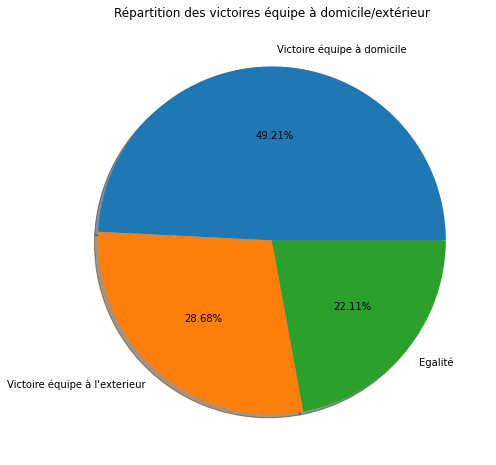

In [27]:
plt.figure(figsize=(8,8))
plt.pie(home_away, labels = ['Victoire équipe à domicile', "Victoire équipe à l'exterieur", 'Egalité'],
        autopct = lambda x: str(round(x, 2)) + '%', shadow = True);
plt.title('Répartition des victoires équipe à domicile/extérieur');

#On observe que les équipes gagnent 50% plus de matchs à domicile qu'à l'extérieur.

In [28]:
df_1617.head()

,date,team_id_home,team_name_home,team_rating_home,team_id_away,team_name_away,team_rating_away,Home_wins,Draw,Away_wins,accurate_pass_x,accurate_pass_y,aerial_lost_x,aerial_lost_y,aerial_won_x,aerial_won_y,att_goal_high_centre_x,att_goal_high_centre_y,att_goal_high_left_x,att_goal_high_left_y,att_goal_high_right_x,att_goal_high_right_y,att_goal_low_centre_x,att_goal_low_centre_y,att_goal_low_left_x,att_goal_low_left_y,att_goal_low_right_x,att_goal_low_right_y,att_miss_high_left_x,att_miss_high_left_y,att_miss_high_right_x,att_miss_high_right_y,att_miss_high_x,att_miss_high_y,att_miss_left_x,att_miss_left_y,att_miss_right_x,att_miss_right_y,att_pen_goal_x,att_pen_goal_y,att_post_high_x,att_post_high_y,att_post_left_x,att_post_left_y,att_post_right_x,att_post_right_y,att_sv_high_centre_x,att_sv_high_centre_y,att_sv_high_left_x,att_sv_high_left_y,att_sv_high_right_x,att_sv_high_right_y,att_sv_low_centre_x,att_sv_low_centre_y,att_sv_low_left_x,att_sv_low_left_y,att_sv_low_right_x,att_sv_low_right_y,blocked_scoring_att_x,blocked_scoring_att_y,fk_foul_lost_x,fk_foul_lost_y,goals_x,goals_y,ontarget_scoring_att_x,ontarget_scoring_att_y,penalty_save_x,penalty_save_y,possession_percentage_x,possession_percentage_y,post_scoring_att_x,post_scoring_att_y,shot_off_target_x,shot_off_target_y,total_offside_x,total_offside_y,total_pass_x,total_pass_y,total_scoring_att_x,total_scoring_att_y,total_tackle_x,total_tackle_y,total_throws_x,total_throws_y,won_contest_x,won_contest_y,won_corners_x,won_corners_y
id_match,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1080506,14/08/2016,13,Arsenal,6.677857,26,Liverpool,7.027143,0,0,1,386,380,17,22,22,17,0,0,0,2,0,0,0,2,2,0,1,0,0,0,0,0,2,0,0,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,2,1,6,13,17,3,4,5,7,0,1,50.7,49.3,0,0,3,3,4,3,485,479,9,16,22,21,25,22,10,11,5,4
1080507,14/08/2016,183,Bournemouth,6.337857,32,Manchester United,7.054286,0,0,1,412,488,8,8,8,8,0,0,0,0,1,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3,0,0,1,0,4,2,7,10,1,3,3,7,0,0,47.4,52.6,0,0,2,2,3,4,483,561,9,11,15,27,26,17,13,8,4,2
1080508,13/08/2016,184,Burnley,6.590000,259,Swansea,7.320714,0,0,1,249,297,32,20,20,32,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,2,0,2,1,2,2,2,10,14,0,1,3,9,0,0,47.5,52.5,0,0,5,6,3,2,353,383,10,17,14,19,41,13,6,8,7,4
1080509,15/08/2016,15,Chelsea,6.901429,29,West Ham,6.582143,1,0,0,480,257,25,24,24,25,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,2,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,4,2,16,16,2,1,6,3,0,0,61.7,38.3,0,0,6,2,1,1,556,350,16,7,18,25,29,12,16,3,7,1
1080510,13/08/2016,162,Crystal Palace,6.670714,175,West Bromwich Albion,7.033846,0,0,1,298,143,21,21,21,21,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,2,2,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,1,1,3,2,12,15,0,1,4,3,0,0,62.3,37.7,0,0,7,8,0,2,414,245,14,13,28,18,21,34,8,5,3,6


In [29]:
#découpage de la possession en 10 intervalles
df_1617['possession'] = pd.cut(df_1617['possession_percentage_x'],
                               bins = [20,30,40,50,60,70,80,90], labels = ['20-30','30-40','40-50','50-60','60-70','70-80','80-90']).astype('str')

In [30]:
mid = df_1617['possession']
df_1617.drop('possession', axis=1, inplace = True)
df_1617.insert(list(df_1617.columns).index('possession_percentage_x') + 1, 'possession', mid)
df_1617.head()

,date,team_id_home,team_name_home,team_rating_home,team_id_away,team_name_away,team_rating_away,Home_wins,Draw,Away_wins,accurate_pass_x,accurate_pass_y,aerial_lost_x,aerial_lost_y,aerial_won_x,aerial_won_y,att_goal_high_centre_x,att_goal_high_centre_y,att_goal_high_left_x,att_goal_high_left_y,att_goal_high_right_x,att_goal_high_right_y,att_goal_low_centre_x,att_goal_low_centre_y,att_goal_low_left_x,att_goal_low_left_y,att_goal_low_right_x,att_goal_low_right_y,att_miss_high_left_x,att_miss_high_left_y,att_miss_high_right_x,att_miss_high_right_y,att_miss_high_x,att_miss_high_y,att_miss_left_x,att_miss_left_y,att_miss_right_x,att_miss_right_y,att_pen_goal_x,att_pen_goal_y,att_post_high_x,att_post_high_y,att_post_left_x,att_post_left_y,att_post_right_x,att_post_right_y,att_sv_high_centre_x,att_sv_high_centre_y,att_sv_high_left_x,att_sv_high_left_y,att_sv_high_right_x,att_sv_high_right_y,att_sv_low_centre_x,att_sv_low_centre_y,att_sv_low_left_x,att_sv_low_left_y,att_sv_low_right_x,att_sv_low_right_y,blocked_scoring_att_x,blocked_scoring_att_y,fk_foul_lost_x,fk_foul_lost_y,goals_x,goals_y,ontarget_scoring_att_x,ontarget_scoring_att_y,penalty_save_x,penalty_save_y,possession_percentage_x,possession,possession_percentage_y,post_scoring_att_x,post_scoring_att_y,shot_off_target_x,shot_off_target_y,total_offside_x,total_offside_y,total_pass_x,total_pass_y,total_scoring_att_x,total_scoring_att_y,total_tackle_x,total_tackle_y,total_throws_x,total_throws_y,won_contest_x,won_contest_y,won_corners_x,won_corners_y
id_match,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1080506,14/08/2016,13,Arsenal,6.677857,26,Liverpool,7.027143,0,0,1,386,380,17,22,22,17,0,0,0,2,0,0,0,2,2,0,1,0,0,0,0,0,2,0,0,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,2,1,6,13,17,3,4,5,7,0,1,50.7,50-60,49.3,0,0,3,3,4,3,485,479,9,16,22,21,25,22,10,11,5,4
1080507,14/08/2016,183,Bournemouth,6.337857,32,Manchester United,7.054286,0,0,1,412,488,8,8,8,8,0,0,0,0,1,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3,0,0,1,0,4,2,7,10,1,3,3,7,0,0,47.4,40-50,52.6,0,0,2,2,3,4,483,561,9,11,15,27,26,17,13,8,4,2
1080508,13/08/2016,184,Burnley,6.590000,259,Swansea,7.320714,0,0,1,249,297,32,20,20,32,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,2,0,2,1,2,2,2,10,14,0,1,3,9,0,0,47.5,40-50,52.5,0,0,5,6,3,2,353,383,10,17,14,19,41,13,6,8,7,4
1080509,15/08/2016,15,Chelsea,6.901429,29,West Ham,6.582143,1,0,0,480,257,25,24,24,25,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,2,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,4,2,16,16,2,1,6,3,0,0,61.7,60-70,38.3,0,0,6,2,1,1,556,350,16,7,18,25,29,12,16,3,7,1
1080510,13/08/2016,162,Crystal Palace,6.670714,175,West Bromwich Albion,7.033846,0,0,1,298,143,21,21,21,21,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,2,2,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,1,1,3,2,12,15,0,1,4,3,0,0,62.3,60-70,37.7,0,0,7,8,0,2,414,245,14,13,28,18,21,34,8,5,3,6


In [31]:
df_possession = df_1617.groupby('possession').agg({'Home_wins':'mean'})

40-50    0.286842
50-60    0.236842
60-70    0.218421
30-40    0.163158
70-80    0.050000
20-30    0.042105
nan      0.002632
Name: possession, dtype: float64

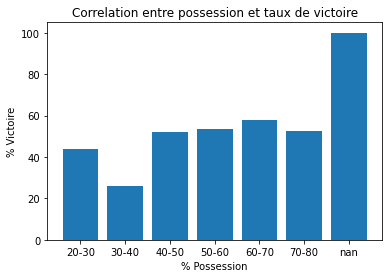

In [32]:
plt.bar(df_possession.index, df_possession['Home_wins']*100)
plt.title('Correlation entre possession et taux de victoire')
plt.xlabel('% Possession')
plt.ylabel('% Victoire')

#on observe une correlation positive très légère entre la possession et le taux de victoire

df_1617['possession'].value_counts(normalize = True)
#70% des matchs ont un taux de répartition de la possession compris dans ces intervalles

In [33]:
bookmakers = pd.read_csv('season-1617_bookmakers.csv')
bookmakers = bookmakers.rename({'Date': 'date', 'HomeTeam':'team_name_home', 'AwayTeam' : 'team_name_away'}, axis = 1)
bookmakers = bookmakers.drop(['Div', 'FTHG', 'FTAG', 'HTHG', 'HTR', 'Referee'], axis = 1)
bookmakers.head()

,date,team_name_home,team_name_away,FTR,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,13/08/16,Burnley,Swansea,A,0,10,17,3,9,10,14,7,4,3,2,0,0,2.40,3.3,3.25,2.45,3.1,2.95,2.50,3.3,2.65,2.45,3.25,3.10,2.47,3.32,3.19,2.50,3.20,2.90,2.50,3.2,3.25,55,2.55,2.43,3.35,3.21,3.30,3.10,40,2.40,2.30,1.68,1.61,32,-0.25,2.13,2.06,1.86,1.81,2.79,3.16,2.89
1,13/08/16,Crystal Palace,West Brom,A,0,14,13,4,3,12,15,3,6,2,2,0,0,2.00,3.3,4.50,2.00,3.2,3.90,2.10,3.3,3.30,2.00,3.25,4.33,2.06,3.29,4.32,2.05,3.10,4.00,2.00,3.3,4.40,56,2.10,2.01,3.40,3.23,4.50,4.16,38,2.68,2.50,1.60,1.52,33,-0.50,2.07,2.00,1.90,1.85,2.25,3.15,3.86
2,13/08/16,Everton,Tottenham,D,0,12,13,6,4,10,14,5,6,0,0,0,0,3.20,3.4,2.40,2.95,3.2,2.40,2.65,3.3,2.50,3.10,3.40,2.40,3.25,3.43,2.37,3.10,3.10,2.40,3.25,3.4,2.38,55,3.30,3.12,3.45,3.32,2.50,2.36,41,2.12,2.05,1.87,1.77,32,0.25,1.91,1.85,2.09,2.00,3.64,3.54,2.16
3,13/08/16,Hull,Leicester,H,0,14,18,5,5,8,17,5,3,2,2,0,0,4.50,3.6,1.91,4.33,3.4,1.90,3.30,3.3,2.10,4.50,3.50,1.91,4.43,3.55,1.95,4.20,3.25,1.95,4.40,3.5,1.95,55,4.50,4.17,3.60,3.43,2.33,1.95,40,2.30,2.19,1.74,1.67,31,0.25,2.35,2.26,2.03,1.67,4.68,3.50,1.92
4,13/08/16,Man City,Sunderland,H,0,16,7,4,3,11,14,9,6,1,2,0,0,1.25,6.5,15.00,1.22,6.0,11.50,1.25,5.5,10.30,1.25,6.50,13.00,1.27,6.48,13.15,1.25,5.50,13.00,1.25,6.5,15.00,56,1.30,1.25,6.80,6.11,15.00,12.55,39,1.56,1.53,2.67,2.48,34,-1.50,1.81,1.73,2.20,2.14,1.25,6.50,14.50


In [34]:
column_odds = ['B365H', 'B365D', 'B365A',
       'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH',
       'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA']

In [35]:
home_odds = [l for l in column_odds if l[-1] == 'H']
draw_odds = [l for l in column_odds if l[-1] == 'D']
away_odds = [l for l in column_odds if l[-1] == 'A']
print(home_odds, draw_odds, away_odds)

['B365H', 'BWH', 'IWH', 'LBH', 'PSH', 'WHH', 'VCH', 'PSCH'] ['B365D', 'BWD', 'IWD', 'LBD', 'PSD', 'WHD', 'VCD', 'PSCD'] ['B365A', 'BWA', 'IWA', 'LBA', 'PSA', 'WHA', 'VCA', 'PSCA']


In [36]:
bookmakers[home_odds].describe()

,B365H,BWH,IWH,LBH,PSH,WHH,VCH,PSCH
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.977658,2.865789,2.797263,2.877211,2.993579,2.929737,2.986737,3.037895
std,2.092902,1.887470,1.773871,1.927703,2.087193,1.965851,2.114494,2.211916
min,1.090000,1.090000,1.120000,1.100000,1.100000,1.100000,1.110000,1.120000
25%,1.670000,1.620000,1.650000,1.642500,1.670000,1.670000,1.665000,1.650000
50%,2.200000,2.150000,2.125000,2.200000,2.225000,2.250000,2.200000,2.230000
75%,3.400000,3.262500,3.150000,3.300000,3.352500,3.325000,3.400000,3.392500
max,13.000000,10.000000,11.000000,12.000000,11.510000,11.000000,13.000000,18.000000


Text(0.5, 1.0, "matrice de corrélation côte victoire à l'extérieur")

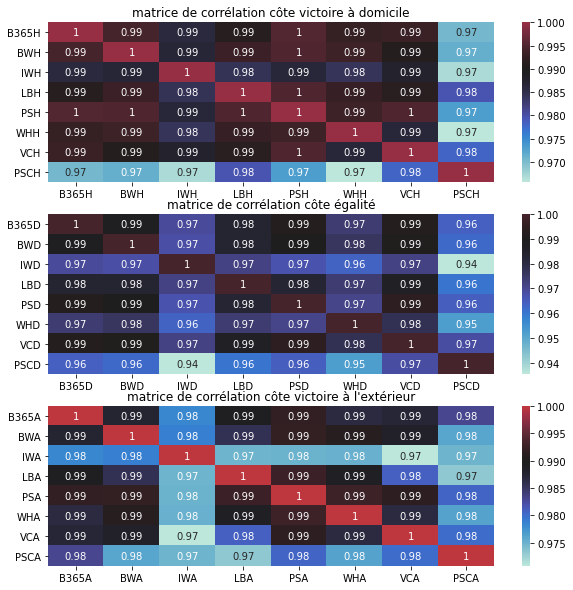

In [37]:
plt.figure(figsize=(10,10))
plt.subplot(311)
sns.heatmap(bookmakers[home_odds].corr(), annot = True, center = 0.990)
plt.title('matrice de corrélation côte victoire à domicile')
plt.subplot(312)
sns.heatmap(bookmakers[draw_odds].corr(), annot = True, center = 0.990)
plt.title('matrice de corrélation côte égalité')
plt.subplot(313)
sns.heatmap(bookmakers[away_odds].corr(), annot = True, center = 0.990)
plt.title("matrice de corrélation côte victoire à l'extérieur")

#les côtes sont toutes hyper corrélées.
#On remarque que les côtes de PSC sont légèrement moins corrélées.
#Cela s'explique par le fait qu'ils proposent les meilleurs côtes. 

Text(0.5, 1.0, "Répartition côtes victoire à l'exterieur")

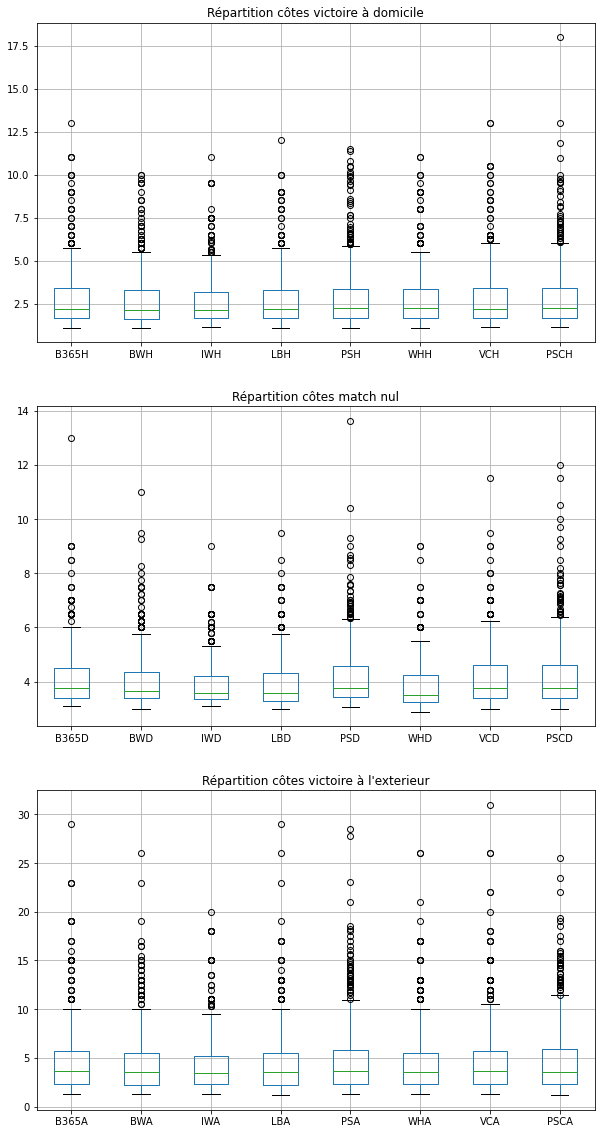

In [38]:
plt.figure(figsize=(10,20))
plt.subplot(311)
bookmakers.boxplot(home_odds)
plt.title('Répartition côtes victoire à domicile')
plt.subplot(312)
bookmakers.boxplot(draw_odds)
plt.title('Répartition côtes match nul')
plt.subplot(313)
bookmakers.boxplot(away_odds)
plt.title("Répartition côtes victoire à l'exterieur")

#Nous observons des valeurs sensiblement équivalentes pour tous les bookmakers.

B365    209
BW       13
IW      146
LB       15
PS      227
PSC     426
VC       63
WH       41
dtype: int64


''

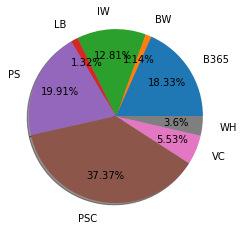

In [39]:
bookmakers_home = bookmakers[home_odds].idxmax(axis = 1).value_counts()
bookmakers_home = bookmakers_home.rename(lambda x : x[:-1])
bookmakers_draw = bookmakers[draw_odds].idxmax(axis = 1).value_counts()
bookmakers_draw = bookmakers_draw.rename(lambda x : x[:-1])
bookmakers_away = bookmakers[away_odds].idxmax(axis = 1).value_counts()
bookmakers_away = bookmakers_away.rename(lambda x : x[:-1])
bookmakers_best = pd.Series([bookmakers_home,bookmakers_draw,bookmakers_away]).sum()
bookmakers_best = bookmakers_best.fillna(0)
print(bookmakers_best)
plt.pie(x=bookmakers_best, labels= bookmakers_best.index, autopct = lambda x: str(round(x, 2)) + '%',pctdistance = 0.7, labeldistance = 1.2,
           shadow = True)
;

In [40]:
bookmakers_home_max = bookmakers[home_odds].max(axis=1)
bookmakers_draw_max = bookmakers[draw_odds].max(axis=1)
bookmakers_away_max = bookmakers[away_odds].max(axis=1)
bookmakers_max = pd.concat([bookmakers[['date','team_name_home','team_name_away', 'FTR']], bookmakers_home_max, bookmakers_draw_max,
                            bookmakers_away_max], axis = 1)
bookmakers_max = bookmakers_max.rename({0 : 'Home_wins', 1 : 'Draw', 2: 'Away_wins'}, axis = 1)
bookmakers_max

,date,team_name_home,team_name_away,FTR,Home_wins,Draw,Away_wins
0,13/08/16,Burnley,Swansea,A,2.79,3.32,3.25
1,13/08/16,Crystal Palace,West Brom,A,2.25,3.30,4.50
2,13/08/16,Everton,Tottenham,D,3.64,3.54,2.50
3,13/08/16,Hull,Leicester,H,4.68,3.60,2.10
4,13/08/16,Man City,Sunderland,H,1.27,6.50,15.00
5,13/08/16,Middlesbrough,Stoke,D,2.40,3.38,3.70
6,13/08/16,Southampton,Watford,D,1.88,3.83,5.00
7,14/08/16,Arsenal,Liverpool,A,2.80,3.53,3.10
8,14/08/16,Bournemouth,Man United,A,5.40,3.65,1.88
9,15/08/16,Chelsea,West Ham,H,1.68,4.38,7.45


In [41]:
# pourcentage de fois où le bookmaker a estimé que l'issue la probabilité de victoire de l'équipe domicile était entre 47.5 et 52.5% de chances
print(bookmakers_max.loc[(bookmakers_max['Home_wins']>=1.90) &(bookmakers_max['Home_wins']<=2.10)]['FTR'].value_counts(normalize= True))
#66% des matchs se sont soldés par une victoire à domicile, le bookmaker a donc sous-côté (côte réelle moyenne de 1.7)

# pourcentage de fois où le bookmaker a estimé égalité à environ 29% de chances
print(bookmakers_max.loc[(bookmakers_max['Draw']>=3.3) &(bookmakers_max['Draw']<=3.6)]['FTR'].value_counts(normalize=True))
# Seuls 27% des matchs se sont soldés par une égalité, le bookmaker a donc souvent raison (côté réelle de 3.7)

# pourcentage de fois où le bookmaker a estimé que l'issue la probabilité de victoire de l'équipe extérieur était entre 47.5 et 52.5% de chances
print(bookmakers_max.loc[(bookmakers_max['Away_wins']>=1.90) &(bookmakers_max['Away_wins']<=2.10)]['FTR'].value_counts(normalize=True))
#66% des matchs se sont soldés par une victoire à l'extérieur, le bookmaker n'a donc pas sous-côté (côte réelle de 2)

H    0.666667
D    0.300000
A    0.033333
Name: FTR, dtype: float64
H    0.492537
D    0.276119
A    0.231343
Name: FTR, dtype: float64
A    0.5
H    0.3
D    0.2
Name: FTR, dtype: float64


In [42]:
#renomme les colonnes de résultats
bookmakers_max = bookmakers_max.rename({'Home_wins' : 'H', 'Draw' : 'D', 'Away_wins' : 'A'}, axis = 1)

In [43]:
#définition d'une fonction de simulation de pari
def gain_paris(matchs, resultats, montants):
    benefices = 0
    for match, resultat, montant in zip(matchs, resultats, montants):
        if bookmakers_max.loc[match]['FTR'] == resultat:
            benefice = (bookmakers_max.loc[match][resultat] - 1)*montant
        else : benefice = -1*montant
        benefices += benefice
    return benefices

In [44]:
gain_paris(range(380), ['D' for a in range(380)], [1000 for i in range(380)])

-29980.0

In [45]:
gain_paris([0,0,0], ['H','D', 'A'], [1/2.79, 1/3.32, 1/3.25])

0.032679933962483476

In [52]:
bookmakers_max['Prob_bk_H'] = (1/bookmakers_max['H']).round(3)
bookmakers_max['Prob_bk_D'] = (1/bookmakers_max['D']).round(3)
bookmakers_max['Prob_bk_A'] = (1/bookmakers_max['A']).round(3)

In [53]:
bookmakers_max.head()

,date,team_name_home,team_name_away,FTR,H,D,A,Prob_BK_H,Prob_BK_D,Prob_BK_A,Prob_bk_H,Prob_bk_D,Prob_bk_A
0,13/08/16,Burnley,Swansea,A,2.79,3.32,3.25,0.358,0.301,0.308,0.358,0.301,0.308
1,13/08/16,Crystal Palace,West Brom,A,2.25,3.30,4.50,0.444,0.303,0.222,0.444,0.303,0.222
2,13/08/16,Everton,Tottenham,D,3.64,3.54,2.50,0.275,0.282,0.400,0.275,0.282,0.400
3,13/08/16,Hull,Leicester,H,4.68,3.60,2.10,0.214,0.278,0.476,0.214,0.278,0.476
4,13/08/16,Man City,Sunderland,H,1.27,6.50,15.00,0.787,0.154,0.067,0.787,0.154,0.067


In [49]:
bookmakers['bet_H?'] = 1 if bookmakers_max['Prob_rf_H'] > bookmakers_max['Prob_bk_H'] else 0
bookmakers['bet_D?'] = 1 if bookmakers_max['Prob_rf_D'] > bookmakers_max['Prob_bk_D'] else 0
bookmakers['bet_A?'] = 1 if bookmakers_max['Prob_rf_A'] > bookmakers_max['Prob_bk_A'] else 0

KeyError: 'Prob_rf_H'

In [60]:
matchs = []
for i in range(380):
    matchs.extend([i,i,i])
matchs

resultats = []
for i in range(380):
    resultats.extend(['H','D','A'])
resultats  
montants = []
for i in range(380):
    resultats.extend(bookmakers_max.loc[i][['bet_H?', 'bet_D?', 'bet_A?']])

['H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D',
 'A',
 'H',
 'D'